#**Pollutant Forecasting**

* #    **Approach : Extra Tree Regressor**


In [ ]:
! pip install --pre pycaret

Importing Libraries

In [ ]:
import pandas as pd
from pycaret.regression import *
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.linalg import norm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import joblib


Loading the Dataset

In [ ]:
lstm_df = pd.read_csv("/content/airport_air_csv.csv")
lstm_df["From Date"] = pd.to_datetime(lstm_df["From Date"],format = '%d-%m-%Y %H:%M')
lstm_df.drop("PM2.5",axis = 1,inplace=True)
lstm_df.set_index("From Date", drop=True, inplace=True)
lstm_df.interpolate(inplace = True)
lstm_df.head(10)

,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,RH,WS,WD,BP,AT,PM10
From Date,,,,,,,,,,,,,,,,
2019-06-06,39.15,22.83,61.97,15.32,5.35,0.38,13.41,4.96,5.96,20.91,67.75,1.06,292.65,1002.14,32.64,60.31
2019-06-07,38.58,24.83,63.41,18.82,6.02,0.37,10.98,6.23,6.14,20.14,71.12,0.92,287.84,1001.78,32.03,59.94
2019-06-08,38.12,23.46,61.58,11.81,7.55,0.42,11.46,5.40,5.95,19.71,71.68,1.00,283.90,1001.06,32.32,84.52
2019-06-09,23.71,20.91,44.63,6.78,7.11,0.30,15.63,3.74,5.70,20.19,72.14,1.16,250.21,1000.10,32.13,69.01
2019-06-10,29.98,36.81,66.79,14.60,7.27,0.48,21.39,4.09,5.59,19.11,75.69,1.47,219.14,998.54,30.74,62.52
2019-06-11,20.33,52.43,72.75,15.60,7.23,0.66,35.06,4.25,5.86,19.73,77.50,1.21,205.09,996.42,30.24,58.69
2019-06-12,18.65,28.18,46.62,12.34,7.80,0.39,20.08,1.80,3.95,12.93,78.81,3.39,137.65,997.10,28.67,61.85
2019-06-13,22.96,25.73,48.70,13.21,8.76,0.24,13.59,0.91,4.74,30.22,81.16,3.40,142.03,1000.57,28.91,81.23
2019-06-14,32.10,28.08,60.18,15.35,6.95,0.37,11.80,1.38,6.44,46.99,85.35,2.67,157.12,1001.79,28.51,57.21


Converting Column of PM10 to list to append to the tranformed dataframe 
in block [23] 

In [ ]:
data_target = lstm_df["PM10"].to_list()
data_target[1:15]

[59.94,
 84.52,
 69.01,
 62.52,
 58.69,
 61.85,
 81.23,
 57.21,
 48.35,
 58.39,
 59.44,
 53.89,
 58.87,
 96.02]

In [ ]:
scaler = StandardScaler()
joblib.dump(scaler,'scaler.bin')
scaled_df = pd.DataFrame(scaler.fit_transform(lstm_df[lstm_df.columns[:-1]]))
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.923373,-0.298824,-0.875932,-0.163884,-0.610069,-0.913057,-0.518566,0.018610,-0.007246,-0.123673,-0.354555,0.371998,2.184398,0.472984,1.966481
1,-0.942624,-0.194427,-0.837176,0.116051,-0.536734,-0.928603,-0.667860,0.095032,0.008267,-0.163453,-0.114278,0.021846,2.040022,0.407283,1.680684
2,-0.958160,-0.265939,-0.886428,-0.444619,-0.369267,-0.850871,-0.638370,0.045087,-0.008108,-0.185669,-0.074350,0.221933,1.921759,0.275881,1.816554
3,-1.444844,-0.399046,-1.342622,-0.846925,-0.417428,-1.037427,-0.382174,-0.054804,-0.029653,-0.160870,-0.041553,0.622106,0.910523,0.100677,1.727536
4,-1.233081,0.430916,-0.746206,-0.221471,-0.399915,-0.757593,-0.028293,-0.033743,-0.039133,-0.216667,0.211558,1.397443,-0.022071,-0.184028,1.076293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,0.601862,-0.301434,0.337894,-0.712557,5.380428,0.237371,0.113629,-0.064433,-0.211495,0.079365,0.163788,0.271954,2.052328,1.832636,1.076293
1446,0.852803,-0.236186,0.570162,-0.658169,5.402319,0.346195,0.121001,-0.056008,-0.184779,0.587733,0.218688,0.121889,0.960050,1.958563,1.034126
1447,0.617736,-0.253933,0.375035,-0.629376,5.384806,0.252917,0.115472,-0.039159,-0.186502,0.326833,0.235086,0.422019,0.835484,1.953088,1.132516
1448,0.866313,-0.317094,0.539749,-0.638174,5.391373,0.221824,0.116086,-0.090910,-0.197706,0.053533,0.195159,-0.003165,1.639009,1.889212,1.212164


In [ ]:
scaled_df["PM10"] = data_target

**Setting up Object for Regression**

In [ ]:
sreg = setup(scaled_df, target="PM10")

,Description,Value
0,Session id,1155
1,Target,PM10
2,Target type,Regression
3,Original data shape,"(1450, 16)"
4,Transformed data shape,"(1450, 16)"
5,Transformed train set shape,"(1014, 16)"
6,Transformed test set shape,"(436, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,20.4340,948.4145,30.5358,0.8395,0.2776,0.2226,0.7410
lightgbm,Light Gradient Boosting Machine,21.9046,1016.6717,31.6017,0.8279,0.2951,0.2380,0.3250
rf,Random Forest Regressor,22.0674,1083.5201,32.6694,0.8175,0.3010,0.2428,0.9800
knn,K Neighbors Regressor,22.6595,1095.2176,32.9475,0.8150,0.2990,0.2359,0.0770
xgboost,Extreme Gradient Boosting,22.9394,1151.9936,33.6679,0.8057,0.3050,0.2434,0.5620
gbr,Gradient Boosting Regressor,23.2918,1195.3635,34.2697,0.7989,0.3213,0.2601,0.4710
ada,AdaBoost Regressor,33.6755,1724.0069,41.4354,0.7100,0.4693,0.4960,0.2660
lasso,Lasso Regression,31.7435,1829.4217,42.6090,0.6916,0.4519,0.3828,0.0410
llar,Lasso Least Angle Regression,31.7436,1829.4271,42.6091,0.6916,0.4519,0.3828,0.0430
br,Bayesian Ridge,31.8842,1840.0289,42.7399,0.6898,0.4533,0.3813,0.0410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

**Creating Model**

In [ ]:
et = create_model("et")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.6729,895.1930,29.9198,0.8687,0.2568,0.2168
1,20.4919,843.5371,29.0437,0.8552,0.3192,0.2628
2,20.3557,871.9948,29.5296,0.8438,0.2622,0.2095
3,20.4399,839.0535,28.9664,0.8566,0.2775,0.2371
4,22.6057,1722.9379,41.5083,0.7023,0.3080,0.2130
5,19.7291,664.3378,25.7748,0.8900,0.2457,0.2021
6,19.8057,940.5357,30.6682,0.8582,0.2743,0.2131
7,20.1095,1021.8036,31.9657,0.8081,0.2839,0.2132
8,20.0005,762.2321,27.6086,0.8737,0.2809,0.2360


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.2981,1229.2806,35.0611,0.8197,0.3083,0.2708
1,23.8126,1263.4596,35.5452,0.7832,0.3434,0.2808
2,21.2729,1074.5994,32.7811,0.8075,0.2835,0.2107
3,21.7316,914.5138,30.2409,0.8437,0.3036,0.2559
4,25.6030,2115.0117,45.9893,0.6346,0.3350,0.2254
5,21.8907,926.4513,30.4377,0.8466,0.2578,0.2073
6,24.0978,1257.7088,35.4642,0.8104,0.3129,0.2527
7,21.6752,1241.9447,35.2412,0.7667,0.3148,0.2260
8,21.1706,829.2473,28.7967,0.8626,0.3127,0.2604


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Prediction on Test Data ( Explicit )**

In [ ]:
df = pd.read_csv("/content/test_data.csv")

# df_new = pd.DataFrame(df[df.columns[0]])
df["From Date"] = pd.to_datetime(df["From Date"],format = '%d-%m-%Y %H:%M')
# df_new["PM10"] = df[df.columns[-1]]
df.set_index("From Date", drop=True, inplace=True)
# df_new
# df_new.reset_index()

In [ ]:
scaler_test = pd.DataFrame(scaler.transform(df[df.columns[:-1]]))
scaler_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.751819,-0.325968,0.443666,-0.653370,5.382617,0.284010,0.113014,-0.056610,-0.245967,-0.119023,-0.056526,0.622106,1.929563,2.040690,1.624461
1,1.084493,-0.469515,0.633141,-0.716556,5.403413,0.315102,0.116701,-0.076468,-0.233040,0.365580,0.039015,0.221933,1.294727,1.869136,1.216849
2,1.228033,-0.444459,0.757754,-0.718155,6.030593,0.377288,0.109942,-0.083689,-0.262341,-0.058060,-0.009468,-0.003165,1.560668,1.704883,1.497961
3,0.065193,-0.091595,0.012502,-0.414226,2.348512,0.330649,0.120387,-0.078875,-0.224422,-0.334459,0.171631,1.097313,1.889642,1.564356,1.765017
4,0.858207,-0.180855,0.605151,-0.576588,2.353984,0.252917,0.116701,-0.071052,-0.185640,-0.212534,0.328488,-0.253274,0.543429,1.664733,1.338664


In [ ]:
predict_model_test = predict_model(tuned_et,data = scaler_test)
predict_model_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,prediction_label
0,0.751819,-0.325968,0.443666,-0.653370,5.382617,0.284010,0.113014,-0.056610,-0.245967,-0.119023,-0.056526,0.622106,1.929563,2.040690,1.624461,86.489299
1,1.084493,-0.469515,0.633141,-0.716556,5.403413,0.315102,0.116701,-0.076468,-0.233040,0.365580,0.039015,0.221933,1.294727,1.869136,1.216849,74.987900
2,1.228033,-0.444459,0.757754,-0.718155,6.030593,0.377288,0.109942,-0.083689,-0.262341,-0.058060,-0.009468,-0.003165,1.560668,1.704883,1.497961,81.065900
3,0.065193,-0.091595,0.012502,-0.414226,2.348512,0.330649,0.120387,-0.078875,-0.224422,-0.334459,0.171631,1.097313,1.889642,1.564356,1.765017,88.716300
4,0.858207,-0.180855,0.605151,-0.576588,2.353984,0.252917,0.116701,-0.071052,-0.185640,-0.212534,0.328488,-0.253274,0.543429,1.664733,1.338664,94.681500


In [ ]:
df["PM10"].values,predict_model_test["prediction_label"].values

(array([63.8 , 57.01, 63.56, 88.27, 81.54]),
 array([86.48929947, 74.98789967, 81.06589989, 88.71629967, 94.68150005]))

In [ ]:
# from scipy import spatial

# cos_et = 1 - spatial.distance.cosine(df["PM10"].values,predict_model_test["prediction_label"].values)
# cos_et

0.9936446198535036

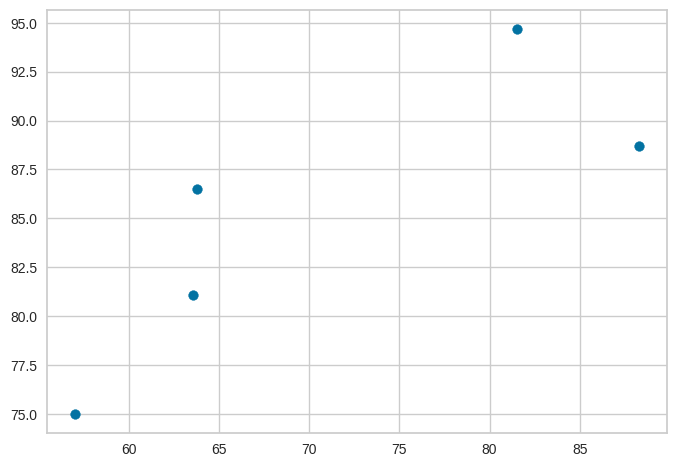

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["PM10"].values,predict_model_test["prediction_label"].values)

**Prediction on Test Data ( Implicit )**

In [ ]:
predict_model_et = predict_model(tuned_et)
predict_model_et

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,18.7325,868.6887,29.4735,0.8584,0.2795,0.2165


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,PM10,prediction_label
717,-1.043271,-0.864661,-1.267263,-1.001289,-0.432751,-1.255076,-0.434396,-0.145068,-0.209771,0.040617,0.171631,-0.028176,1.262910,-0.339156,1.212164,90.760002,87.993051
306,-0.515045,-0.927299,-1.170372,0.020073,-0.989880,-1.130705,-0.897637,-0.250375,-0.389028,-1.118711,0.226531,-0.603426,0.976258,0.032968,0.232958,71.599998,70.864967
134,0.854492,0.117723,0.755870,1.298976,-0.486385,0.470566,-0.738513,-0.104750,1.021755,1.074920,-0.191993,-0.428350,-1.245219,0.774921,0.172050,156.490005,154.307700
1324,1.547535,0.721664,1.619543,1.254986,0.980318,-0.462213,0.367367,-0.026522,-0.191673,0.149627,-0.397334,-0.953578,-0.193461,2.467748,-1.711399,226.330002,209.029403
1438,0.784580,-0.194427,0.535712,-0.461415,5.209130,0.151866,0.118237,-0.053300,-0.253723,0.307201,0.353799,1.097313,0.072329,1.544280,1.380831,82.459999,81.591900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,0.826122,0.503995,0.855183,1.233391,0.753746,0.905862,1.511338,-0.187190,-0.204600,0.499389,-1.620109,-0.528393,-0.913243,0.023195,-0.001302,200.149994,207.199601
936,0.466091,0.160004,0.468158,-0.618978,-0.282797,1.512169,0.253707,-0.103547,-0.171851,-0.070459,-0.130676,-0.778502,0.080584,0.008665,-1.388121,220.380005,200.181300
1282,0.311068,0.382893,0.459815,-0.230269,-0.334241,0.315102,0.844124,-0.079476,-0.264927,0.465291,-1.434732,-0.303296,-1.300148,1.693933,-0.750934,167.809998,184.094501
1376,1.703233,0.999362,1.886531,2.037204,-0.262001,2.134021,0.117315,0.993452,-0.241658,0.172359,-1.899600,-0.253274,-1.343071,1.440253,1.586980,219.940002,237.236598


In [ ]:
# # define two lists or array
# original_PM = np.array(predict_model_et["PM10"])
# predicted_PM = np.array(predict_model_et["prediction_label"])
 
# # compute cosine similarity
# cosine = np.dot(original_PM,predicted_PM)/(norm(original_PM)*norm(predicted_PM))
# print("Cosine Similarity:", cosine)

Cosine Similarity: 0.9805779350240342


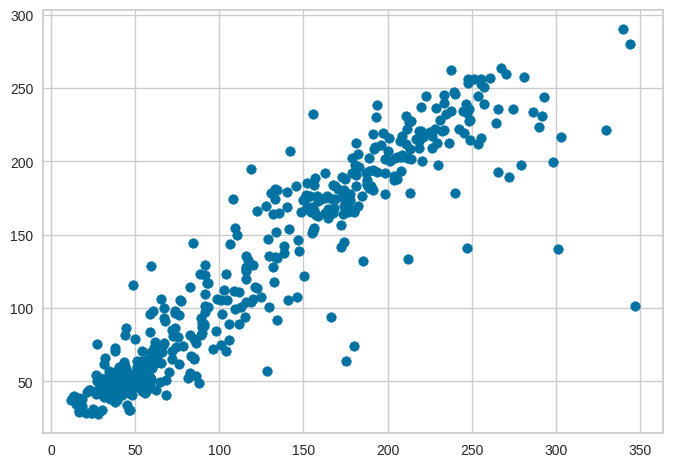

In [ ]:
# plt.figure(figsize=())
plt.scatter(predict_model_et["PM10"].values,predict_model_et["prediction_label"].values)

**Plotting the best fit Line**

In [ ]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X = predict_model_et["PM10"].values.reshape(-1, 1) ,y= predict_model_et["prediction_label"].values.reshape(-1, 1))

LinearRegression()

<Axes: >

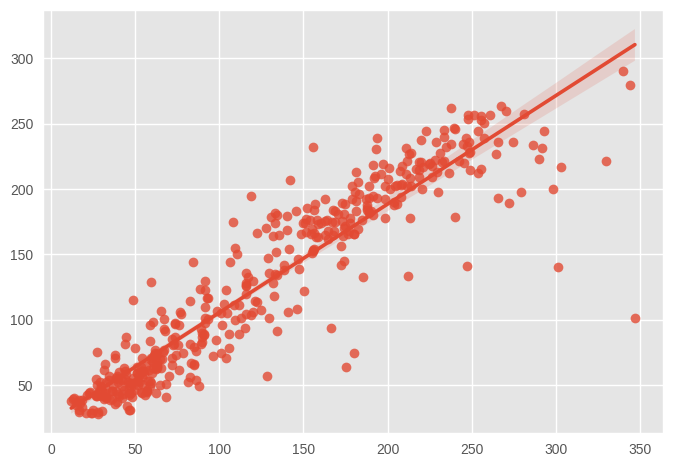

In [ ]:
model_linear.intercept_ , model_linear.coef_
# y = 0.85x + 20
import seaborn as sns
plt.style.use("ggplot")
sns.regplot(x=predict_model_et["PM10"].values.reshape(-1, 1) ,y= predict_model_et["prediction_label"].values.reshape(-1, 1))

**Exporting the model into a pickle file**

In [ ]:
import pickle
pickle.dump(tuned_et, open('model_tuned_et.pkl', 'wb'))